C:\Users\gjftn\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


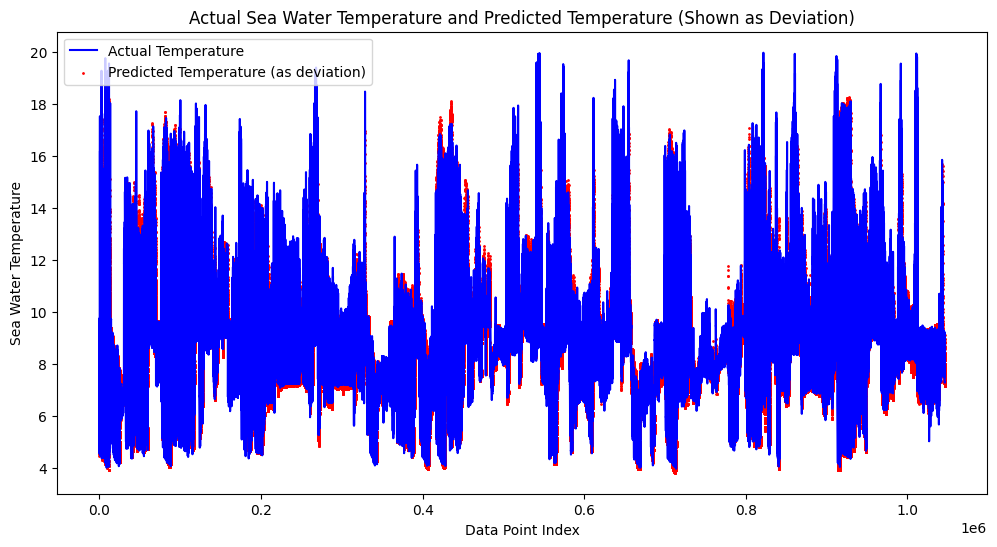

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'presentation_data\final_ensemble_predictions.csv')

actual_temperature = df['actual_sea_water_temperature']
predicted_temperature = df['predicted_sea_water_temperature']



deviation = df['predicted_sea_water_temperature'] - df['actual_sea_water_temperature']


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['actual_sea_water_temperature'], color='blue', label='Actual Temperature')
plt.scatter(df.index, df['actual_sea_water_temperature'] + deviation, color='red', label='Predicted Temperature (as deviation)', s=1)

plt.xlabel('Data Point Index')
plt.ylabel('Sea Water Temperature')
plt.title('Actual Sea Water Temperature and Predicted Temperature (Shown as Deviation)')
plt.legend()
plt.show()


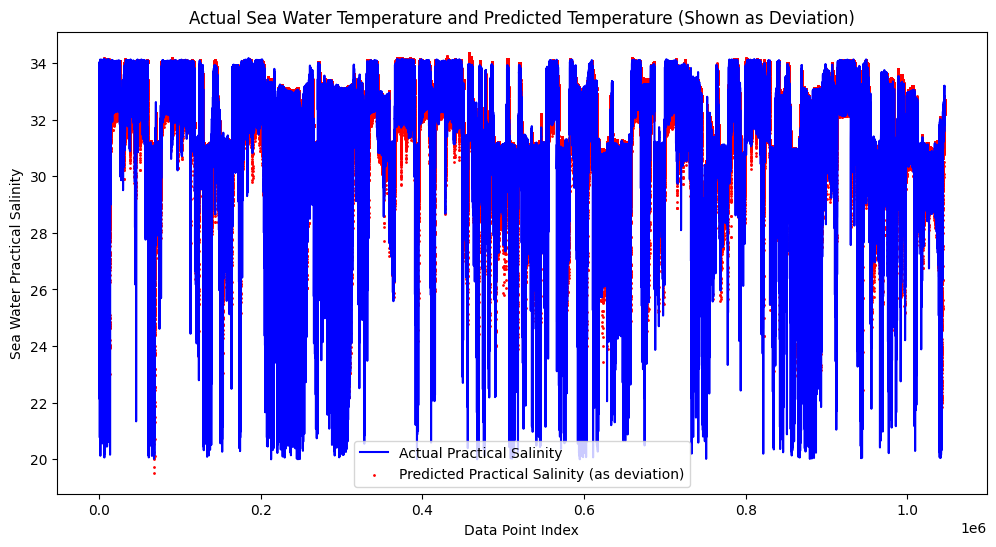

In [6]:
actual_practical_salinity = df['actual_sea_water_practical_salinity']
predicted_practical_salinity = df['predicted_sea_water_practical_salinity']

deviation = df['predicted_sea_water_practical_salinity'] - df['actual_sea_water_practical_salinity']


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['actual_sea_water_practical_salinity'], color='blue', label='Actual Practical Salinity')
plt.scatter(df.index, df['actual_sea_water_practical_salinity'] + deviation, color='red', label='Predicted Practical Salinity (as deviation)', s=1)

plt.xlabel('Data Point Index')
plt.ylabel('Sea Water Practical Salinity')
plt.title('Actual Sea Water Temperature and Predicted Temperature (Shown as Deviation)')
plt.legend()
plt.show()

In [7]:
df['temperature_deviation'] = (df['predicted_sea_water_temperature'] - df['actual_sea_water_temperature']).abs()
df['salinity_deviation'] = (df['predicted_sea_water_practical_salinity'] - df['actual_sea_water_practical_salinity']).abs()

temp_threshold = df['temperature_deviation'].quantile(0.95)
salinity_threshold = df['salinity_deviation'].quantile(0.95)

top_5_percent_deviation = df[(df['temperature_deviation'] >= temp_threshold) | (df['salinity_deviation'] >= salinity_threshold)]
final_df = top_5_percent_deviation[['date', 'actual_sea_water_temperature', 'predicted_sea_water_temperature',
                                    'actual_sea_water_practical_salinity', 'predicted_sea_water_practical_salinity']]

final_df.to_csv('top_5_percent_deviation.csv', index=False)
